### Regresión logística

En el script se trabajará con el dataset de _Pima Indians Diabetes_ extraído de [Kaggle](https://www.kaggle.com/datasets/uciml/Pima-indians-diabetes-database). Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, en función de ciertas mediciones diagnósticas incluidas en el conjunto de datos. En particular, todos los pacientes del dataset son mujeres de al menos 21 años de edad de ascendencia indígena Pima.

Las variables presentes son:
* Cantidad de embarazos - Pregnancies
* Concentración de glucosa - Glucose
* Presión arterial - BloodPressure
* Grosor de la piel - SkinThickness
* Nivel de insulina - Insulin
* Índice de masa corporal - BMI
* Medida del historial de diabetes en la familia - DiabetesPedigreeFunction
* Edad en años - Age
* Variable objetivo - Outcome, donde 0 implica no diabetes y 1 diabetes

In [1]:
# Comenzamos importando las librerías a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay


In [2]:
# Importamos los datos
df =pd.read_csv('diabetes.csv')

# Imprimimos los primeros registros para iniciar a conocer la información que tenemos
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Consultamos información sobre las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Observamos que se cuentan con 768 registros, de los cuales todas las variables son numéricas y sin valores nulos. El siguiente paso es analizar la correlación entre las variables.

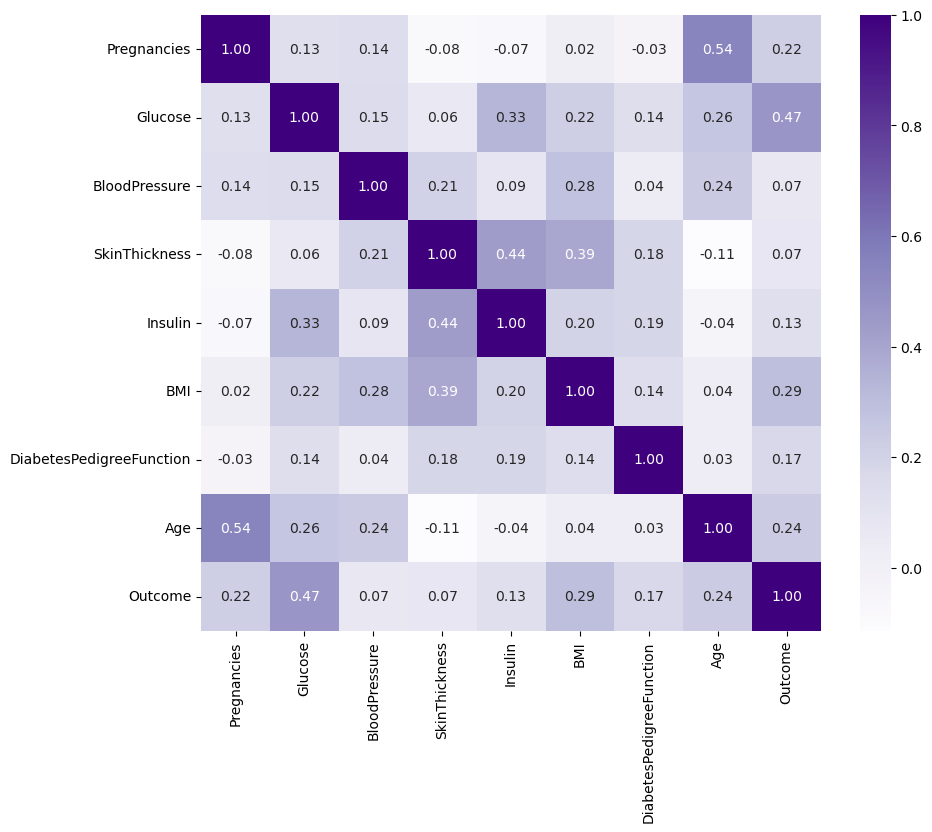

In [17]:
corr_matrix = df.corr()  # Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.show()

Observamos que las variables no están fuertemente correlacionadas, salvo tal vez el número de embarazos y edad, que es de poco más de 0.5.

In [4]:
# Obtenemos estadísticas descriptivas de la información
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De donde observamos que las variables tienen diferentes escalas, por mencionar un ejemplo, en la variable _BloodPressure_ el máximo es de 120, mientras que en la variable _DiabetesPedigreeFunction_ es de poco más de 2. Es por esto que estandarizaremos las variables para evitar que las variables con valores grandes dominen el modelo y afecten su desempeño

In [5]:
# Definimos las variables
    # Dependiente
y = df['Outcome']
    # Independientes
input_cols = [v for v in df.columns if v!='Outcome']
X = df[input_cols]


In [6]:
# Definidas las variables, estandarizamos la información
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
# Creamos conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3, shuffle=True)

Una vez estandarizadas las variables y creados los conjutnos de información, podemos comenzar con el modelo

In [8]:
model = LogisticRegression() # Inicializamos el modelo
model.fit(X_train, y_train)  # Lo entrenamos con los conjuntos definidos anteriormente

y_pred = model.predict(X_test)  # Realizamos predicciones (etiquetas)
y_probs = model.predict_proba(X_test) # Predecimos probabilidades


Ya creado el modelo, nos interesa conocer el qué tan bien realiza las clasificaciones, por lo que se consultaran unas métricas que nos brindarán información sobre esto, para lo cual consultaremos la matriz de confusión resultante del modelo.

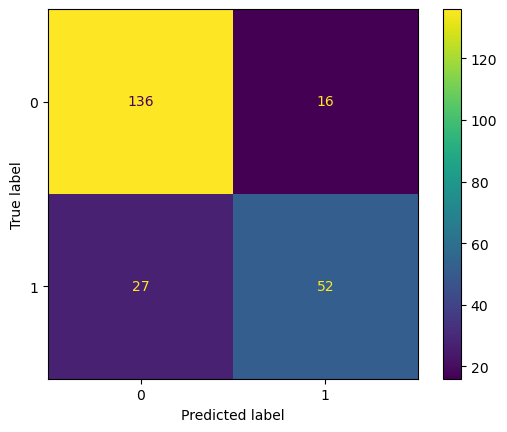

In [10]:
# Matriz de confusión
mat_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = mat_conf)
#print(f'Matriz de confusión: {mat_conf}')
disp.plot()

De la matriz de confusión podemos decir que el modelo es bueno para clasificar las categorías verdaderas, ya sean positivas (iabetes) o negativas (no diabetes). Pero para verificar esta observación, calcularemos métricas resultantes de la matriz de confusión.

In [11]:
# Accuracy
accuracy_model = accuracy_score(y_test, y_pred)
print('Accuracy Score: {0:0.4f}'. format(accuracy_model))


Accuracy Score: 0.8139


Obtenemos un accuracy de 0.81, lo nos indica que poco más del 80% de las pacientes fue clasificada correctamente.

In [12]:
# Precision
precision_model = precision_score(y_test, y_pred)
print('Precision Score: {0:0.4f}'. format(precision_model))

Precision Score: 0.7647


Esta métrica nos indica que de todas las observaciones que el modelo predijo como positivas, el 76.47% realmente lo eran.

In [13]:
# Sensibilidad (Recall)
recall_model = recall_score(y_test, y_pred)
print('Recall Score: {0:0.4f}'. format(recall_model))

Recall Score: 0.6582


Por su parte la sensibilidad nos indica que el modelo está identificando correctamente el 65.82% de los casos positivos reales, lo que en este caso no es tan favorable ya que cerca del 35% de los pacientes con diabetes fueron diagnosticados como no diabéticos cuando sí lo eran.

In [14]:
# F1 score
f1_model = f1_score(y_test, y_pred)
print('F1 Score: {0:0.4f}'. format(f1_model))

F1 Score: 0.7075


 En este caso, el F1 score nos dice que el modelo mantiene un buen balance entre precisión y recall, aunque se puede mejorar.
 
 Por último, tenemos el ROC accuracy, el cual nos dice sobre la capacidad del modelo para distinguir entre clases positivas y negativas.

LogisticRegression(): auc_score=0.86 %


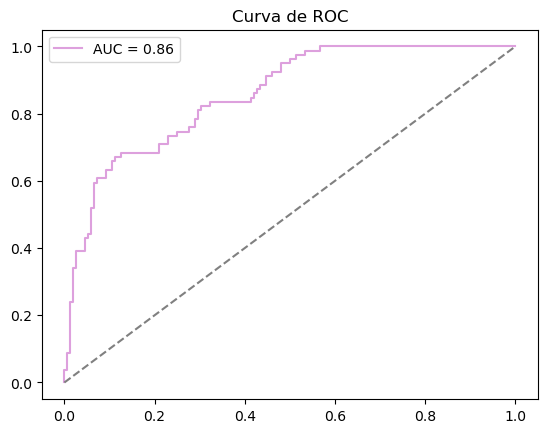

In [15]:
# ROC accuracy
auc = roc_auc_score(y_test, y_probs[:, 1])
print(f"{model}: auc_score={auc:.2f} %")

# Gráfico curva ROC
fpr, tpr, threesholds = roc_curve(y_true=y_test, y_score=y_probs[:, 1])
plt.plot(fpr, tpr, c = 'plum', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (modelo aleatorio)
plt.title('Curva de ROC')
plt.legend()
plt.show()

Un Accuracy score de 0.86, nos dice que el modelo tiene un 86% de probabilidad de clasificar correctamente una instancia positiva con un score mayor que una instancia negativa.